# Testing surface attribute calculation
## Introduction
There are different methods available to calculate both gradient (slope steepness and slope direction) and curvature attributes of a given surface.

The EIS-toolkit contains following defaults, however, they're interchangeable to some point. Results of each calculation returns a dictionary containing the names (key) and respective arrays and metadata (tuple).


## Examples

### Set-up

In [1]:
# Modules and basic set-up
import numpy as np
import os
import rasterio

import sys
sys.path.insert(0, "/eis_toolkit/")

from eis_toolkit.surface_attributes.parameters import first_order, second_order_basic_set
from eis_toolkit.surface_attributes.utilities import classify_aspect
from eis_toolkit.utilities.conversions import convert_deg_to_rad, convert_rad_to_deg, convert_deg_to_rise

np.set_printoptions(suppress=True)

# Path to data
file_path = '/eis_toolkit/tests/data/local/data/dgm10_fg.tif'
file_name = os.path.splitext(os.path.basename(file_path))[0]   
results_path = '/eis_toolkit/tests/data/local/results/surface_derivatives/'

raster = rasterio.open(file_path)


### Helper

In [2]:
import math
import matplotlib.pyplot as plt

# Plotting
def plots_side_by_side(box_width, box_heigth, *argv):
    """plot multiple images side by side"""
    num_cols = 5
    
    if isinstance(argv[0], str):
      num_images = 1
    elif isinstance(argv[0], tuple):
      num_images = len(argv)
            
    num_rows = math.ceil(num_images/num_cols)
    
    plt.figure(figsize=(box_width*num_cols, box_heigth*num_rows))

    for i in range(0, num_images):
      parameter = argv[i][0] if num_images > 1 else argv[0]
      image = argv[i][1] if num_images > 1 else argv[1]

      plt.subplot(num_rows, num_cols, i+1)
      plt.subplots_adjust(wspace=0.1, hspace=0)
      plt.title(parameter)
      plt.axis("off")
      plt.imshow(image, cmap='viridis')
      plt.colorbar(location='right', shrink=0.5, pad=0.02);
      
      i += 1
      
      
# Exporting
def export_raster(array, name, meta=None, export=True, path=results_path):
    if export is True:  
      file_path = path + name + '.tif'
      
      if meta is not None:
          with rasterio.open(file_path, 'w', **meta) as dst:
              dst.write(np.float32(array), 1)
      else:
          with rasterio.open(file_path, 'w', driver='GTiff', 
                          height=array.shape[0], width=array.shape[1], 
                          count=1, dtype=np.float32) as dst:
              dst.write(array, 1)

### First order derivatives

#### Horn (1981)

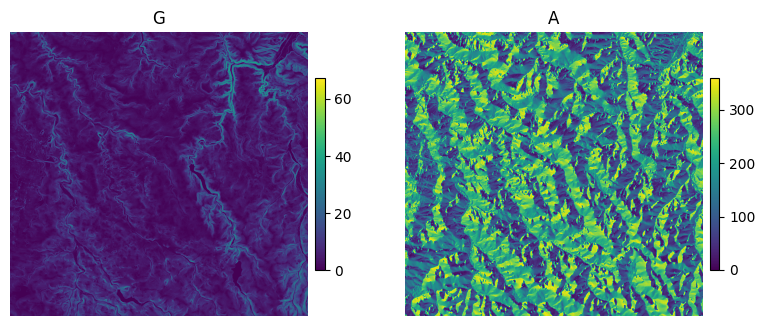

In [3]:
# Calculation of slope and aspect in degrees
gradient = first_order(raster, parameters=["G", "A"], slope_gradient_unit="degrees", slope_direction_unit="degrees")

slope = gradient["G"][0]
aspect = gradient["A"][0]

plots_side_by_side(5, 5, ("G", slope), ("A", aspect))

# Export 
export = False
export_raster(slope, "test_first_order_horn_G", gradient["G"][1], export=export)
export_raster(aspect, "test_first_order_horn_A", gradient["A"][1], export=export)

#### Zevenbergen & Thorne (1987)

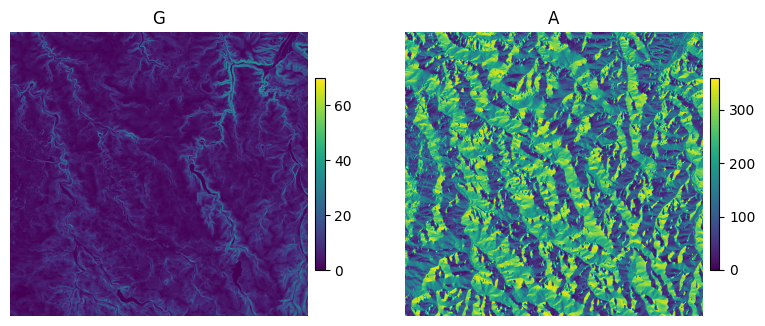

In [4]:
# Calculation of slope and aspect in degrees
gradient = first_order(raster, parameters=["G", "A"], slope_gradient_unit="degrees", slope_direction_unit="degrees", method="Zevenbergen")

slope = gradient["G"][0]
aspect = gradient["A"][0]

plots_side_by_side(5, 5, ("G", slope), ("A", aspect))

# Export 
export = False
export_raster(slope, "test_first_order_zt_G", gradient["G"][1], export=export)
export_raster(aspect, "test_first_order_zt_A", gradient["A"][1], export=export)

#### Evans-Young (1978/1979)

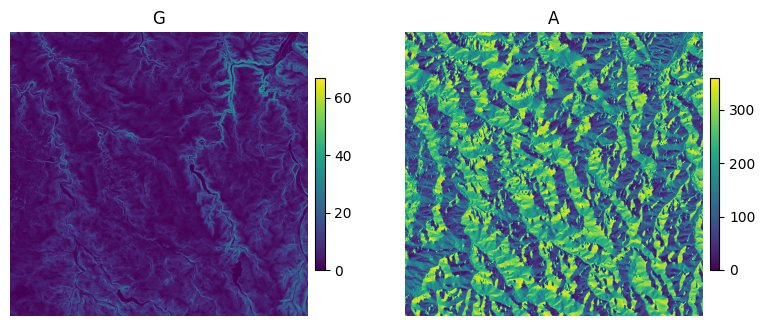

In [5]:
# Calculation of slope and aspect in degrees
gradient = first_order(raster, parameters=["G", "A"], slope_gradient_unit="degrees", slope_direction_unit="degrees", method="Young")

slope = gradient["G"][0]
aspect = gradient["A"][0]

plots_side_by_side(5, 5, ("G", slope), ("A", aspect))

# Export 
export = False
export_raster(slope, "test_first_order_young_G", gradient["G"][1], export=export)
export_raster(aspect, "test_first_order_young_A", gradient["A"][1], export=export)

#### Evans (1979)

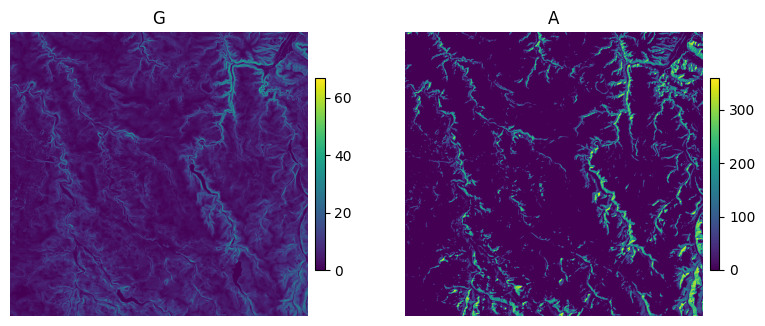

In [6]:
# Calculation of slope and aspect in degrees
gradient = first_order(raster, parameters=["G", "A"], slope_tolerance=10, slope_gradient_unit="degrees", slope_direction_unit="degrees", method="Evans")

slope = gradient["G"][0]
aspect = gradient["A"][0]

plots_side_by_side(5, 5, ("G", slope), ("A", aspect))

# Export 
export = False
export_raster(slope, "test_first_order_evans_G", gradient["G"][1], export=export)
export_raster(aspect, "test_first_order_evans_A", gradient["A"][1], export=export)

### Second order basic curvatures

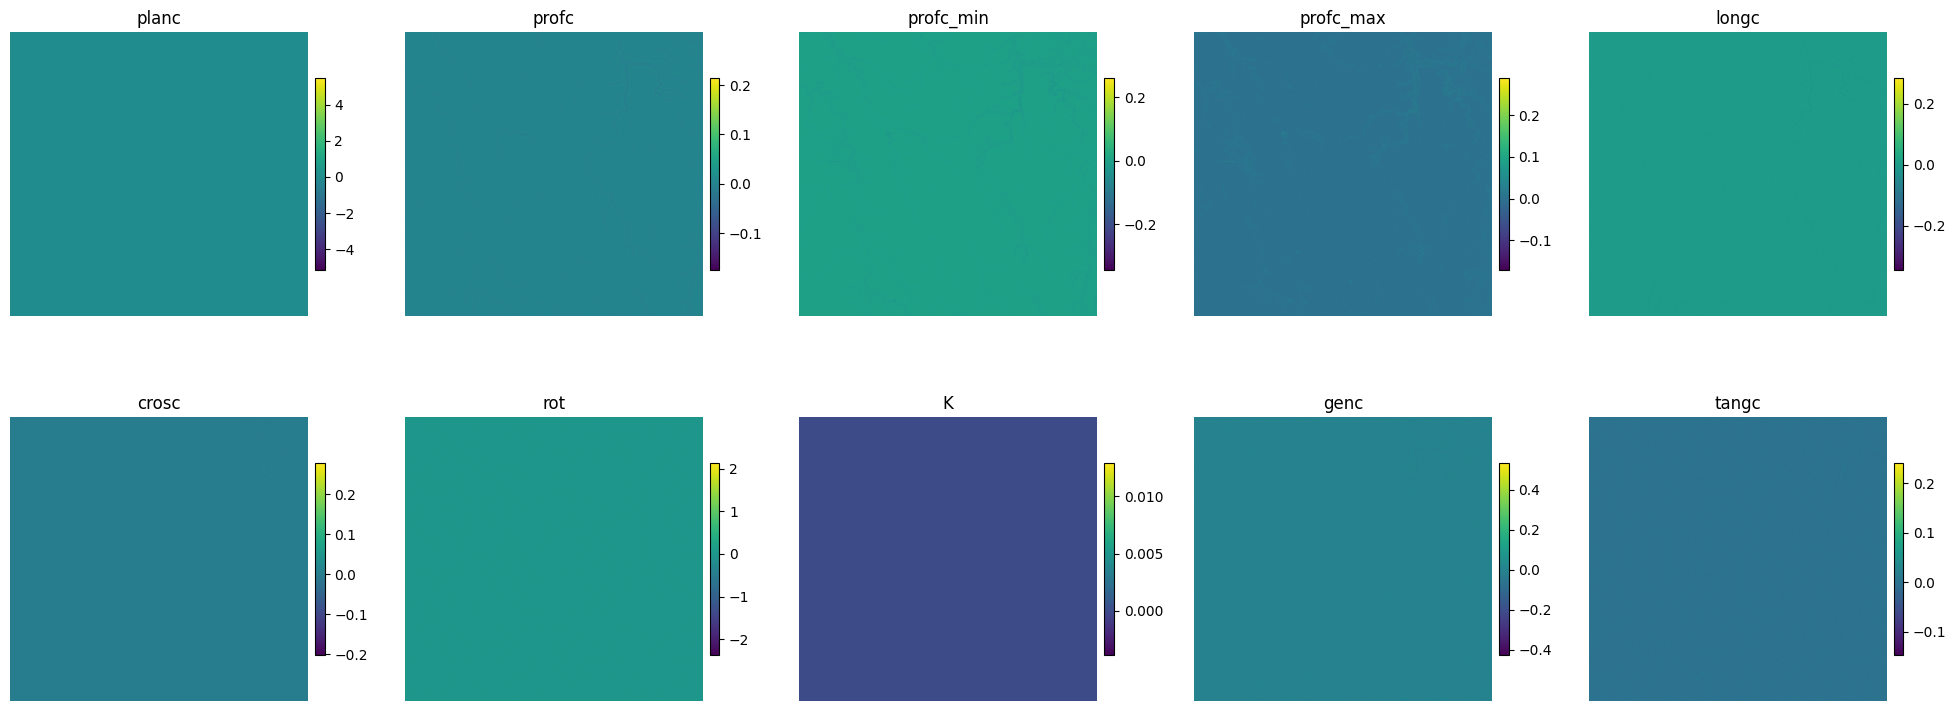

In [10]:
second_order = second_order_basic_set(raster, parameters=["planc", "profc", "profc_min", "profc_max", "longc", "crosc", "rot", "K", "genc", "tangc"], method="Zevenbergen")

planc = second_order["planc"][0]
profc = second_order["profc"][0]
profc_min = second_order["profc_min"][0]
profc_max = second_order["profc_max"][0]
longc = second_order["longc"][0]
crosc = second_order["crosc"][0]
rot = second_order["rot"][0]
K =  second_order["K"][0]
genc = second_order["genc"][0]
tangc = second_order["tangc"][0]

# Plotting
plots_side_by_side(5, 5, ("planc", planc), ("profc", profc), ("profc_min", profc_min), ("profc_max", profc_max), ("longc", longc), ("crosc", crosc), ("rot", rot), ("K", K), ("genc", genc), ("tangc", tangc))

# Export 
export = False
export_raster(planc, "test_second_order_zt_planc", second_order["planc"][1], export=export)
export_raster(profc, "test_second_order_zt_profc", second_order["profc"][1], export=export)
export_raster(profc_min, "test_second_order_zt_profc_min", second_order["profc_min"][1], export=export)
export_raster(profc_max, "test_second_order_zt_profc_max", second_order["profc_max"][1], export=export)
export_raster(longc, "test_second_order_zt_longc", second_order["longc"][1], export=export)
export_raster(crosc, "test_second_order_zt_crosc", second_order["crosc"][1], export=export)
export_raster(rot, "test_second_order_zt_rot", second_order["rot"][1], export=export)
export_raster(K, "test_second_order_zt_K", second_order["K"][1], export=export)
export_raster(genc, "test_second_order_zt_genc", second_order["genc"][1], export=export)
export_raster(tangc, "test_second_order_zt_tangc", second_order["tangc"][1], export=export)



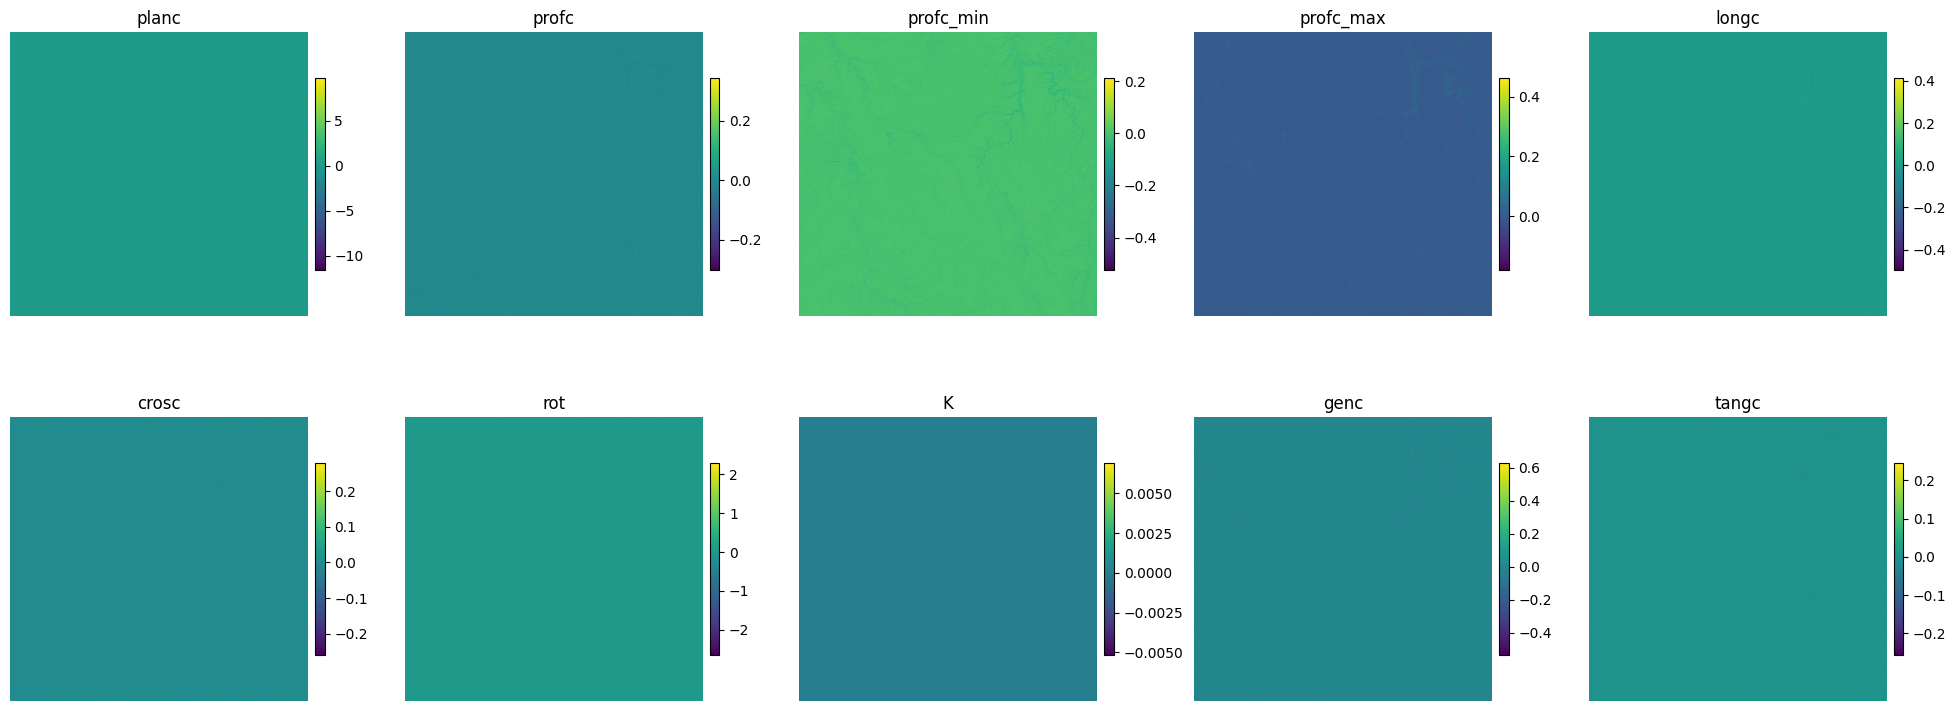

In [11]:
second_order = second_order_basic_set(raster, parameters=["planc", "profc", "profc_min", "profc_max", "longc", "crosc", "rot", "K", "genc", "tangc"], method="Young")

planc = second_order["planc"][0]
profc = second_order["profc"][0]
profc_min = second_order["profc_min"][0]
profc_max = second_order["profc_max"][0]
longc = second_order["longc"][0]
crosc = second_order["crosc"][0]
rot = second_order["rot"][0]
K =  second_order["K"][0]
genc = second_order["genc"][0]
tangc = second_order["tangc"][0]

# Plotting
plots_side_by_side(5, 5, ("planc", planc), ("profc", profc), ("profc_min", profc_min), ("profc_max", profc_max), ("longc", longc), ("crosc", crosc), ("rot", rot), ("K", K), ("genc", genc), ("tangc", tangc))

# Export 
export = True
export_raster(planc, "test_second_order_young_planc", second_order["planc"][1], export=export)
export_raster(profc, "test_second_order_young_profc", second_order["profc"][1], export=export)
export_raster(profc_min, "test_second_order_young_profc_min", second_order["profc_min"][1], export=export)
export_raster(profc_max, "test_second_order_young_profc_max", second_order["profc_max"][1], export=export)
export_raster(longc, "test_second_order_young_longc", second_order["longc"][1], export=export)
export_raster(crosc, "test_second_order_young_crosc", second_order["crosc"][1], export=export)
export_raster(rot, "test_second_order_young_rot", second_order["rot"][1], export=export)
export_raster(K, "test_second_order_young_K", second_order["K"][1], export=export)
export_raster(genc, "test_second_order_young_genc", second_order["genc"][1], export=export)
export_raster(tangc, "test_second_order_young_tangc", second_order["tangc"][1], export=export)

